In [328]:
from datascience import *
import numpy as np
path_data = '../../../../data/'
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [329]:
Table()


Tables
Tables are a fundamental object type for representing data sets. A table can be viewed in two ways:

a sequence of named columns that each describe a single aspect of all entries in a data set, or
a sequence of rows that each contain all information about a single entry in a data set.
In order to use tables, import all of the module called datascience, a module created for this text.

#A table method is just like a function, but it must operate on a table. So the call looks like


#name_of_table.method(arguments)
The with_columns method on a table constructs a new table with additional labeled columns. Each column of a table is an array. 
To add one new column to a table, call with_columns with a label and an array. (The with_column method can be used with the same effect.)

In [330]:
Table().with_columns('Number of petals', make_array(8, 34, 5))

Number of petals
8
34
5


To add two (or more) new columns, provide the label and array for each column. 
All columns must have the same length, or an error will occur.

In [331]:
Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [332]:
Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [333]:
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)

#then extend the table with another column.
flowers.with_columns(
    'Color', make_array('pink', 'yellow', 'red')
)

Number of petals,Name,Color
8,lotus,pink
34,sunflower,yellow
5,rose,red


The with_columns method creates a new table each time it is called, so the original table is not affected. 
For example, the table flowers still has only the two columns that it had when it was created.

In [334]:
flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [335]:
flowers.num_columns

2

In [336]:
flowers.size

Number of petals,Name
3,3


In [337]:
#finding numbers of rows
flowers.num_rows

3

In [338]:
flowers.labels

('Number of petals', 'Name')

In [339]:
#Renaming label
flowers.relabeled('Name', 'Flowerr Name')

Number of petals,Flowerr Name
8,lotus
34,sunflower
5,rose


In [340]:
#However, this method does not change the original table.
flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [341]:
flowers.num_rows

3

In [342]:
flowers.num_columns

2

In [343]:
#acessing data in a column using labels
flowers.column('Name')

array(['lotus', 'sunflower', 'rose'], dtype='<U9')

In [344]:
#acessing data in a column using indexes
flowers.column(1)

array(['lotus', 'sunflower', 'rose'], dtype='<U9')

In [345]:
flowers.column(1).item(2)

'rose'

Creating tables in this way involves a lot of typing. If the data have already been entered somewhere, it is usually possible to use Python to read it into a table, instead of typing it all in cell by cell.

Often, tables are created from files that contain comma-separated values. Such files are called CSV files.
minard = Table.read_table(path_data + 'minard.csv')
minard

In [346]:
 alp = Table().with_column('letter', make_array('c','d','e'))
alp.with_column('what', make_array('c','d','e'))


letter,what
c,c
d,d
e,e


In [347]:
alp #does not chnage alp makes a new column

letter
c
d
e


In [348]:
alp.show(1)
#to see a fixed number of rows

letter
c


In [349]:
alp = Table().with_column('letter', make_array('c','d','e'))
alp = alp.with_column('what', make_array('c','d','e'))
alp

letter,what
c,c
d,d
e,e


In [350]:

t = Table().with_columns(['Sizes', ['S', 'M', 'L', 'XL'], 'Waists', [30, 34, 38, 42],])
t

Sizes,Waists
S,30
M,34
L,38
XL,42


In [351]:
t.where('Sizes',  are.equal_to('L'))

Sizes,Waists
L,38


In [352]:
t.where('Waists', are.above_or_equal_to(38))

Sizes,Waists
L,38
XL,42


In [353]:
t.where('Waists', are.strictly_between(30, 38))

Sizes,Waists
M,34


In [354]:
 t.where('Waists', are.between(30, 38)) #http://data8.org/datascience/predicates.html

Sizes,Waists
S,30
M,34


In [355]:
#DATASCIENCE tables plot
#http://data8.org/datascience/_autosummary/datascience.tables.Table.plot.html
y = Table().with_columns( 'days',  make_array(0, 1, 2, 3, 4, 5),'price', make_array(90.5, 90.00, 83.00, 95.50, 82.00, 82.00),'projection', make_array(90.75, 82.00, 82.50, 82.50, 83.00, 82.50))

In [356]:
y

days,price,projection
0,90.5,90.75
1,90,82
2,83,82.5
3,95.5,82.5
4,82,83
5,82,82.5


In [357]:
price1 = y.column('projection').item(0)
price1
y.column('projection')



array([90.75, 82.  , 82.5 , 82.5 , 83.  , 82.5 ])

In [358]:
y.column('projection')/price1

array([1.        , 0.90358127, 0.90909091, 0.90909091, 0.91460055,
       0.90909091])

Working with the Data in a Column
Because columns are arrays, we can use array operations on them to discover new information

In [359]:
y = y.with_columns(
    'NewColumn', y.column('projection')/price1
)

y


days,price,projection,NewColumn
0,90.5,90.75,1
1,90,82,0.903581
2,83,82.5,0.909091
3,95.5,82.5,0.909091
4,82,83,0.914601
5,82,82.5,0.909091


FORMATTING
To make the proportions in the new columns appear as percents, we can use the method set_format with the option PercentFormatter. The set_format method takes Formatter objects, which exist for dates (DateFormatter), currencies (CurrencyFormatter), numbers, and percentages.

In [360]:
y.set_format('NewColumn', PercentFormatter)

days,price,projection,NewColumn
0,90.5,90.75,100.00%
1,90,82,90.36%
2,83,82.5,90.91%
3,95.5,82.5,90.91%
4,82,83,91.46%
5,82,82.5,90.91%


Choosing Sets of Columns
The method select creates a new table that contains only the specified columns.

In [361]:
choose_one_column = y.select('projection')
choose_one_column
#Notice that the result is a table, unlike the result of column, which is an array.

projection
90.75
82
82.5
82.5
83
82.5


In [362]:
column_choose = y.column('projection')
column_choose
#notice the result is an array unlike for select - which was a table

array([90.75, 82.  , 82.5 , 82.5 , 83.  , 82.5 ])

In [363]:
new_y = y.select('price','NewColumn')
new_y

price,NewColumn
90.5,100.00%
90,90.36%
83,90.91%
95.5,90.91%
82,91.46%
82,90.91%


The same selection can be made using column indices instead of labels.

In [364]:
new_y1 = y.select(1,3)
new_y1

price,NewColumn
90.5,100.00%
90,90.36%
83,90.91%
95.5,90.91%
82,91.46%
82,90.91%


enough of addition. 
Lets drop columns

In [365]:
y

days,price,projection,NewColumn
0,90.5,90.75,100.00%
1,90,82,90.36%
2,83,82.5,90.91%
3,95.5,82.5,90.91%
4,82,83,91.46%
5,82,82.5,90.91%


In [366]:
y.drop('days')

price,projection,NewColumn
90.5,90.75,100.00%
90,82,90.36%
83,82.5,90.91%
95.5,82.5,90.91%
82,83,91.46%
82,82.5,90.91%


In [367]:
y
#notice y is not changed it still has the days columns

days,price,projection,NewColumn
0,90.5,90.75,100.00%
1,90,82,90.36%
2,83,82.5,90.91%
3,95.5,82.5,90.91%
4,82,83,91.46%
5,82,82.5,90.91%


In [368]:
y_new = y.drop('days')
y_new


price,projection,NewColumn
90.5,90.75,100.00%
90,82,90.36%
83,82.5,90.91%
95.5,82.5,90.91%
82,83,91.46%
82,82.5,90.91%


In [369]:
y

days,price,projection,NewColumn
0,90.5,90.75,100.00%
1,90,82,90.36%
2,83,82.5,90.91%
3,95.5,82.5,90.91%
4,82,83,91.46%
5,82,82.5,90.91%


Neither select nor drop change the original table. Instead, they create new smaller tables that share the same data. The fact that the original table is preserved is useful! You can generate multiple different tables that only consider certain columns without worrying that one analysis will affect the other.

In [370]:
np.char.count('Jimiie', 'Jim')

array(1)

LETS PLOT

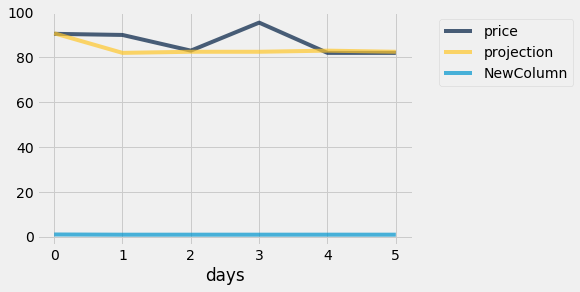

In [371]:
y.plot('days') 
#line graph with days as x-axis and lines for price and projection>

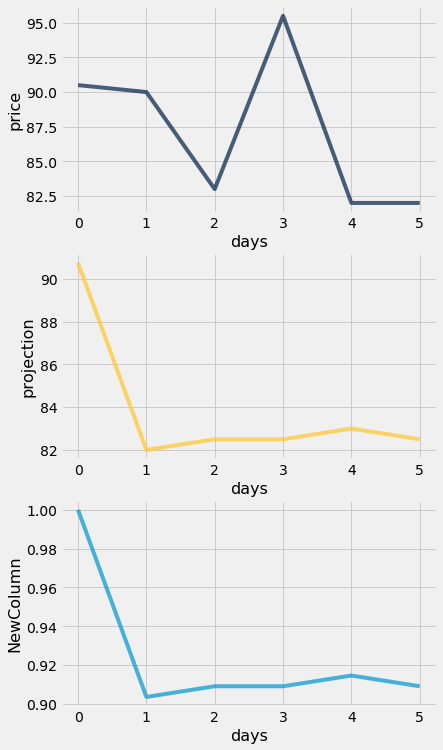

In [372]:
y.plot('days', overlay=False)
#two separate graphs for other 

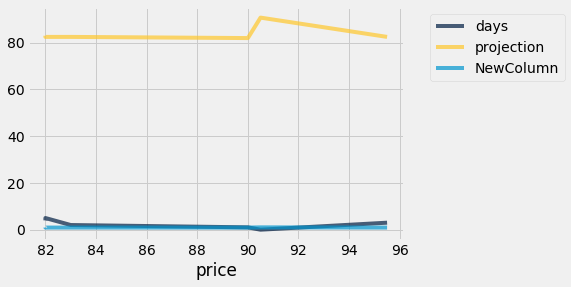

In [373]:
y.plot('price') 
#line graph with price as x-axis and lines for days and projection>

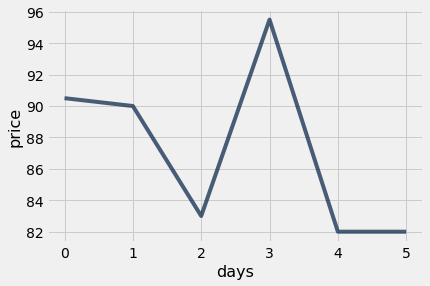

In [374]:
y.plot('days', 'price')

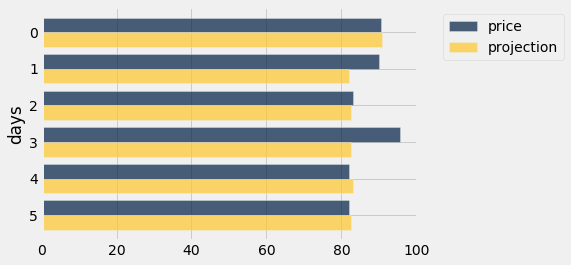

In [375]:
y.barh('days', make_array(1, 2))

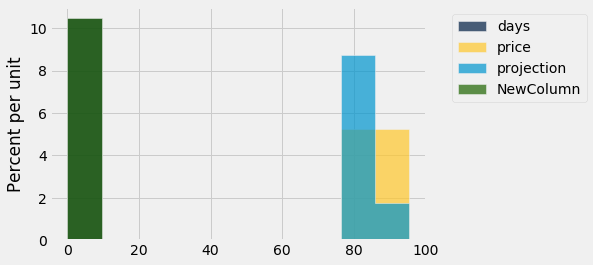

In [376]:
y.hist()

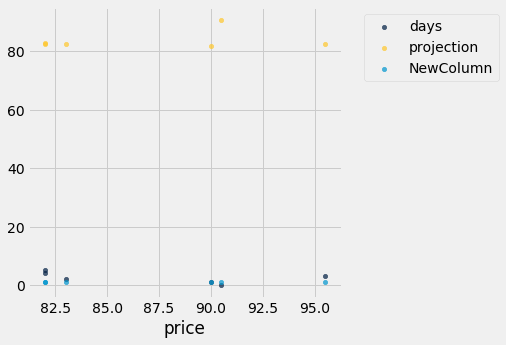

In [377]:
y.scatter('price')

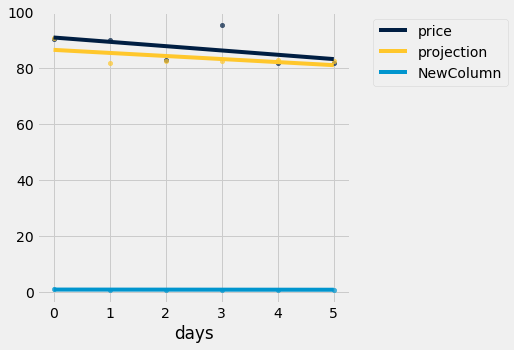

In [378]:
y.scatter('days', fit_line=True)

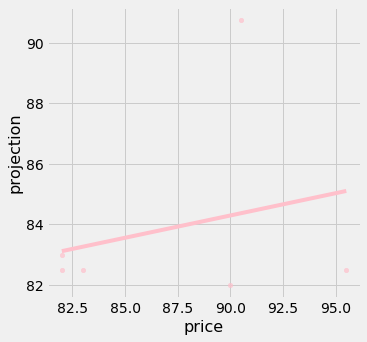

In [379]:
y.scatter('price','projection', fit_line=True, color ="pink")

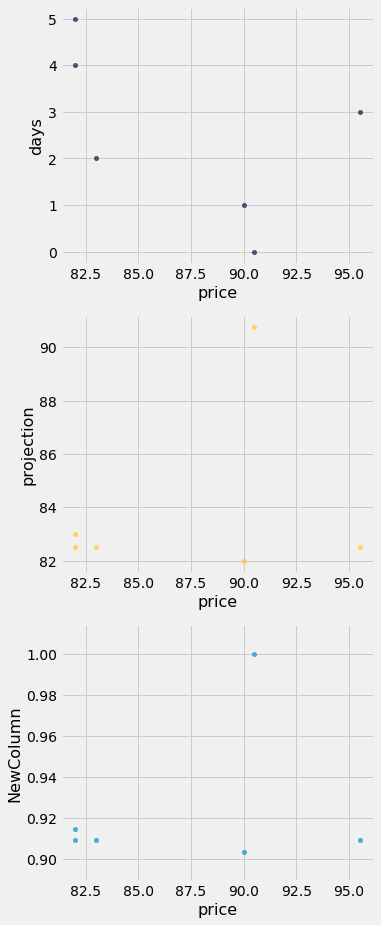

In [380]:
y.scatter('price', overlay=False)

In [381]:
box_table = Table().with_columns(
'test1', make_array(92.5, 88, 72, 71, 99, 100, 95, 83, 94, 93),
'test2', make_array(89, 84, 74, 66, 92, 99, 88, 81, 95, 94))
box_table

test1,test2
92.5,89
88,84
72,74
71,66
99,92
100,99
95,88
83,81
94,95
93,94


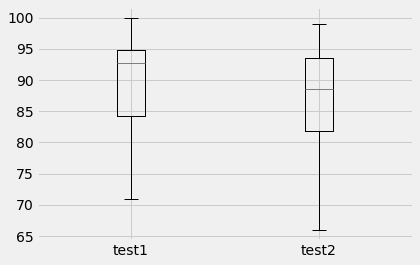

In [382]:
box_table.boxplot()

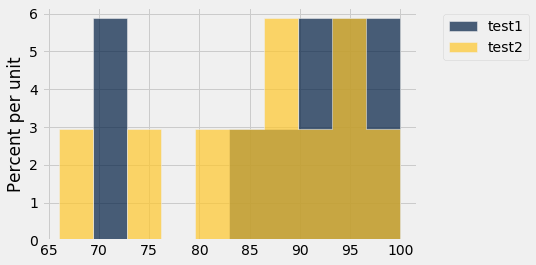

In [383]:
box_table.hist()

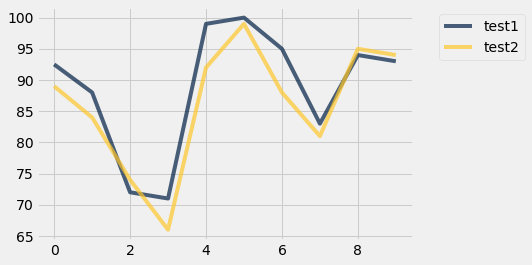

In [384]:
box_table.plot()

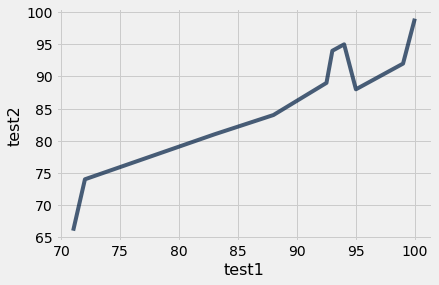

In [385]:
box_table.plot('test1')

In [386]:
#https://python4astronomers.github.io/plotting/advanced.html
plots.figure(figsize=(6, 6))
#The first thing to consider when making a publication-quality plot 
#is what the final desired size of the plot will be. The figure size can be specified via figsize argument
#figsize argument takes a tuple of two values, the width and height of the figure in inches



<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [387]:
cones = Table().with_columns([
        'flavor',['strawberry','chocolate','bubblegum','chocolate'],
        'color',['red','blue','pink','brown'],
        'price', [3.5,3.55,10,6]
    ])
print(cones)

flavor     | color | price
strawberry | red   | 3.5
chocolate  | blue  | 3.55
bubblegum  | pink  | 10
chocolate  | brown | 6


In [388]:
cones.select('flavor')
#to seleect a column

flavor
strawberry
chocolate
bubblegum
chocolate


In [389]:
#selct two columns
cones.select('flavor', 'price')

flavor,price
strawberry,3.5
chocolate,3.55
bubblegum,10
chocolate,6


In [390]:
cones.drop('color')

flavor,price
strawberry,3.5
chocolate,3.55
bubblegum,10
chocolate,6


In [391]:
cones
#dropping didnot change cones original table

flavor,color,price
strawberry,red,3.5
chocolate,blue,3.55
bubblegum,pink,10
chocolate,brown,6


In [392]:
no_colors = cones.drop('color')

no_colors

flavor,price
strawberry,3.5
chocolate,3.55
bubblegum,10
chocolate,6


In [393]:
cones.sort('price')
#The sort method creates a new table by arranging the rows of the original table in ascending order of the values in the specified column. 

flavor,color,price
strawberry,red,3.5
chocolate,blue,3.55
chocolate,brown,6
bubblegum,pink,10


In [394]:
cones.sort('price', descending=True)

flavor,color,price
bubblegum,pink,10
chocolate,brown,6
chocolate,blue,3.55
strawberry,red,3.5


In [395]:
#selcting rows that satisfy function
cones.where('flavor', 'chocolate')

flavor,color,price
chocolate,blue,3.55
chocolate,brown,6


In [396]:
newcones = cones.where('flavor', 'chocolate')
newcones
#We can also create a new table called `newcones` consisting of just the data for the chocolate flavors

flavor,color,price
chocolate,blue,3.55
chocolate,brown,6


In [397]:
cones

flavor,color,price
strawberry,red,3.5
chocolate,blue,3.55
bubblegum,pink,10
chocolate,brown,6


In [398]:

"That's " + str(1 + 1) + ' ' + str(True)

"That's 2 True"

In [399]:
"loud".upper()

'LOUD'

In [400]:
'hitchhiker'.replace('hi', 'ma')
#The replace method takes two arguments, the text to be replaced and its replacement.

'matchmaker'

In [401]:
s = "train"
t = s.replace('t', 'ing')
print(t)
u = t.replace('in', 'de')
u

ingrain


'degrade'

In [402]:
s
#replace does not chnage s

'train'

In [403]:
1 < 1 + 1 > 3


False

In [404]:
1 < 1 + 1 < 3


True

In [405]:
#COMPARISONS
x = 12
y = 5
min(x, y) <= (x+y)/2 <= max(x, y)

True

In [406]:
#Strings can also be compared, AND their order is alphabetical. 
#A shorter string is less than a longer string that begins with the shorter string.
"Dog" > "Catastrophe" > "Cat"

True

In [407]:
 marbles = Table().with_columns(
"Color", make_array("Red", "Green", "Blue", "Red", "Green", "Green"),
"Shape", make_array("Round", "Rectangular", "Rectangular", "Round", "Rectangular", "Round"),
 "Amount", make_array(4, 6, 12, 7, 9, 2),
"Price", make_array(1.30, 1.30, 2.00, 1.75, 1.40, 1.00))

In [408]:
marbles

Color,Shape,Amount,Price
Red,Round,4,1.3
Green,Rectangular,6,1.3
Blue,Rectangular,12,2
Red,Round,7,1.75
Green,Rectangular,9,1.4
Green,Round,2,1


In [409]:
marbles.sort("Color")
#SORTED alaphabetically according to color

Color,Shape,Amount,Price
Blue,Rectangular,12,2
Green,Rectangular,6,1.3
Green,Rectangular,9,1.4
Green,Round,2,1
Red,Round,4,1.3
Red,Round,7,1.75


In [410]:
marbles.sort("Price")

Color,Shape,Amount,Price
Green,Round,2,1
Red,Round,4,1.3
Green,Rectangular,6,1.3
Green,Rectangular,9,1.4
Red,Round,7,1.75
Blue,Rectangular,12,2


In [411]:
marbles.sort("Price", descending = True)

Color,Shape,Amount,Price
Blue,Rectangular,12,2
Red,Round,7,1.75
Green,Rectangular,9,1.4
Green,Rectangular,6,1.3
Red,Round,4,1.3
Green,Round,2,1


In [412]:
marbles.sort(2) 
#sorting as per column with index 2 i.e amount

Color,Shape,Amount,Price
Green,Round,2,1
Red,Round,4,1.3
Green,Rectangular,6,1.3
Red,Round,7,1.75
Green,Rectangular,9,1.4
Blue,Rectangular,12,2


In [413]:
marbles.sort(3) # the Price column

Color,Shape,Amount,Price
Green,Round,2,1
Red,Round,4,1.3
Green,Rectangular,6,1.3
Green,Rectangular,9,1.4
Red,Round,7,1.75
Blue,Rectangular,12,2


In [414]:
marbles.sort(3, distinct = True)
#removes duplicates

Color,Shape,Amount,Price
Green,Round,2,1
Red,Round,4,1.3
Green,Rectangular,9,1.4
Red,Round,7,1.75
Blue,Rectangular,12,2


Selecting Rows

In [415]:
marbles

Color,Shape,Amount,Price
Red,Round,4,1.3
Green,Rectangular,6,1.3
Blue,Rectangular,12,2
Red,Round,7,1.75
Green,Rectangular,9,1.4
Green,Round,2,1


The Table method take does just that – it takes a specified set of rows. Its argument is a row index or array of indices, and it creates a new table consisting of only those rows.



In [416]:
marbles.take(0)

Color,Shape,Amount,Price
Red,Round,4,1.3


We could also get the fourth, fifth, and sixth rows by specifying a range of indices as the argument.

In [417]:
marbles.take(np.arange(2,5,2))

Color,Shape,Amount,Price
Blue,Rectangular,12,2
Green,Rectangular,9,1.4


In [418]:
marbles.take(np.arange(2,5))

Color,Shape,Amount,Price
Blue,Rectangular,12,2
Red,Round,7,1.75
Green,Rectangular,9,1.4


If we want a table of the top 5 highest prices, 
we can first sort the list by salary and then take the first five rows:

In [419]:
marbles.sort('Price').take(np.arange(0,5))

Color,Shape,Amount,Price
Green,Round,2,1
Red,Round,4,1.3
Green,Rectangular,6,1.3
Green,Rectangular,9,1.4
Red,Round,7,1.75


to MAKE A table OF take the lowest prices , we can sort in descending order and then take the first five rows

In [420]:
marbles.sort('Price', descending= True).take(np.arange(0,5))

Color,Shape,Amount,Price
Blue,Rectangular,12,2
Red,Round,7,1.75
Green,Rectangular,9,1.4
Green,Rectangular,6,1.3
Red,Round,4,1.3


In [421]:
marbles.where('Price',are.above(1))
#rows with values greater than 1

Color,Shape,Amount,Price
Red,Round,4,1.3
Green,Rectangular,6,1.3
Blue,Rectangular,12,2
Red,Round,7,1.75
Green,Rectangular,9,1.4


In [422]:
#to get a sorted column by decreasing amount
marbles.where('Price',are.above(1)).sort('Amount', descending="True")

Color,Shape,Amount,Price
Blue,Rectangular,12,2
Green,Rectangular,9,1.4
Red,Round,7,1.75
Green,Rectangular,6,1.3
Red,Round,4,1.3


In [423]:
#to find a particular column
marbles.where('Color', are.equal_to('Red'))


Color,Shape,Amount,Price
Red,Round,4,1.3
Red,Round,7,1.75


In [424]:
marbles.where('Price', are.above(2))


Color,Shape,Amount,Price


In [425]:
marbles.where('Price', are.equal_to(2)).show()
#The .show() at the end of the line ensures that all rows are shown, not just the first 10.

Color,Shape,Amount,Price
Blue,Rectangular,12,2


In [426]:
marbles.where('Price', are.equal_to(2)).show()

Color,Shape,Amount,Price
Blue,Rectangular,12,2


In [427]:
marbles.where('Price', are.above(0.7))

Color,Shape,Amount,Price
Red,Round,4,1.3
Green,Rectangular,6,1.3
Blue,Rectangular,12,2
Red,Round,7,1.75
Green,Rectangular,9,1.4
Green,Round,2,1


It is so common to ask for the rows for which some column is equal to some value that the are.equal_to call is optional

In [428]:
marbles.where('Shape','Round')

Color,Shape,Amount,Price
Red,Round,4,1.3
Red,Round,7,1.75
Green,Round,2,1


In [429]:
marbles.where('Shape', are.equal_to('Round'))

Color,Shape,Amount,Price
Red,Round,4,1.3
Red,Round,7,1.75
Green,Round,2,1


Multiple Features

In [430]:
marbles.where('Color', 'Red').where('Amount', are.above(2))

Color,Shape,Amount,Price
Red,Round,4,1.3
Red,Round,7,1.75


In [431]:
marbles.where('Color', 'Green').where('Amount', are.above(2))

Color,Shape,Amount,Price
Green,Rectangular,6,1.3
Green,Rectangular,9,1.4


In [432]:
marbles.where('Price', are.between(1.5, 2))


Color,Shape,Amount,Price
Red,Round,7,1.75


Notice this does not take 2 into account 

In [433]:
marbles.where('Price', are.between(1.5, 2.1))

Color,Shape,Amount,Price
Blue,Rectangular,12,2
Red,Round,7,1.75


If we specify a condition that isn’t satisfied by any row, we get a table with column labels but no rows.

In [434]:
marbles.where('Price', are.between(2.1, 3))

Color,Shape,Amount,Price


In [435]:
marbles.where('Color', are.containing('r'))

Color,Shape,Amount,Price
Green,Rectangular,6,1.3
Green,Rectangular,9,1.4
Green,Round,2,1


In [436]:
marbles.where('Color', are.containing('R'))

Color,Shape,Amount,Price
Red,Round,4,1.3
Red,Round,7,1.75


In [437]:
#Big TABLES

In [438]:
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'


In [439]:
full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


In [440]:
#let's learn a little about the table
full_census_table.num_rows

306

In [441]:
full_census_table.num_columns

10

SELECT YOUR OWN TABLE FROM THE BIGGER TABLE
Typically, a public table will contain more information than necessary for a particular investigation or analysis. In this case, let us suppose that we are only interested in the population changes from 2010 to 2014. Let us select the relevant columns.



In [442]:
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial_census_table

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


In [443]:
partial_census_table.relabeled('POPESTIMATE2010','estimate')

SEX,AGE,estimate,POPESTIMATE2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


In [444]:
#relabeling two tables at once
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
us_pop

SEX,AGE,2010,2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


In [445]:
increase_in_pop = us_pop.column('2014')-us_pop.column('2010')

In [446]:
increase_in_pop

array([  -1555,   -8112, -131198, -104841,  -71835,  -57753,   62917,
        112280,   95299,  -17066,  -70120,  -28109,  -42597,   51364,
         88225,  -66206, -144693, -189854, -263085, -242373, -147187,
        104417,  328724,  484928,  451809,  221942,  247237,   97780,
        107699,  181502,  -48905,  280701,  356349,  345083,  542559,
        147447,  186512,   79984, -218592, -341956, -528085, -243668,
         14986,  240006,  211775, -275930, -452565, -452590, -374925,
       -188852, -153824,   -9581,    -396,   96027,  286313,  162886,
        302813,  400505,  388913,  461267,  368877,  314258,  190223,
        -80557,  781504,  704299,  725725,  791534,  212543,  366465,
        402861,  566098,  310125,  251396,  203518,  141878,  211994,
        106931,   78429,   58281,  -57188,    1754,   -6674,    7161,
         47346,    7934,   32174,   47480,   36745,   51635,   62750,
         80872,   64071,   65821,   46553,   25211,   23324,   14196,
         12689,    9

In [447]:
#Adding 2 columns 
#one equating the array to a column called change
#second creating a new column called %change (by using the aaray and an old column)
census = us_pop.with_columns(
    'Change', increase_in_pop, '%change', increase_in_pop/us_pop.column('2010'))

In [448]:
census

SEX,AGE,2010,2014,Change,%change
0,0,3951330,3949775,-1555,-0.000393538
0,1,3957888,3949776,-8112,-0.00204958
0,2,4090862,3959664,-131198,-0.032071
0,3,4111920,4007079,-104841,-0.0254968
0,4,4077551,4005716,-71835,-0.0176172
0,5,4064653,4006900,-57753,-0.0142086
0,6,4073013,4135930,62917,0.0154473
0,7,4043046,4155326,112280,0.0277711
0,8,4025604,4120903,95299,0.0236732
0,9,4125415,4108349,-17066,-0.0041368


In [449]:
census.set_format('%change', PercentFormatter)


SEX,AGE,2010,2014,Change,%change
0,0,3951330,3949775,-1555,-0.04%
0,1,3957888,3949776,-8112,-0.20%
0,2,4090862,3959664,-131198,-3.21%
0,3,4111920,4007079,-104841,-2.55%
0,4,4077551,4005716,-71835,-1.76%
0,5,4064653,4006900,-57753,-1.42%
0,6,4073013,4135930,62917,1.54%
0,7,4043046,4155326,112280,2.78%
0,8,4025604,4120903,95299,2.37%
0,9,4125415,4108349,-17066,-0.41%


In [450]:
census.sort('Change')

SEX,AGE,2010,2014,Change,%change
0,40,4387480,3859395,-528085,-12.04%
0,47,4535473,4082883,-452590,-9.98%
0,46,4529716,4077151,-452565,-9.99%
0,48,4534663,4159738,-374925,-8.27%
0,39,4324463,3982507,-341956,-7.91%
0,45,4438559,4162629,-275930,-6.22%
1,40,2189516,1917201,-272315,-12.44%
0,18,4491005,4227920,-263085,-5.86%
2,40,2197964,1942194,-255770,-11.64%
0,41,4163478,3919810,-243668,-5.85%


In [451]:
census.sort('Change', descending=True)

SEX,AGE,2010,2014,Change,%change
0,999,309346863,318907401,9560538,3.09%
1,999,152088043,156955337,4867294,3.20%
2,999,157258820,161952064,4693244,2.98%
0,67,2693707,3485241,791534,29.38%
0,64,2706055,3487559,781504,28.88%
0,66,2621335,3347060,725725,27.69%
0,65,2678525,3382824,704299,26.29%
0,71,1953607,2519705,566098,28.98%
0,34,3822189,4364748,542559,14.19%
0,23,4217228,4702156,484928,11.50%


In [452]:
us_pop


SEX,AGE,2010,2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


The SEX column contains numeric codes: 0 stands for the total, 1 for male, and 2 for female. The AGE column contains ages in completed years, but the special value 999 represents the entire population regardless of age. 


In [453]:
us_pop.where('SEX', are.equal_to(0)).where('AGE', are.between(97, 101))

SEX,AGE,2010,2014
0,97,68893,83089
0,98,47037,59726
0,99,32178,41468
0,100,54410,71626


Understanding AGE = 100


Not surprisingly, the numbers of people are smaller at higher ages – for example, there are fewer 99-year-olds than 98-year-olds.It does come as a surprise, though, that the numbers for AGE 100 are quite a bit larger than those for age 99. A closer examination of the documentation shows that it’s because the Census Bureau used 100 as the code for everyone aged 100 or more.



In [454]:
us_pop_2014 = us_pop.drop('2010')

In [455]:
us_pop_2014

SEX,AGE,2014
0,0,3949775
0,1,3949776
0,2,3959664
0,3,4007079
0,4,4005716
0,5,4006900
0,6,4135930
0,7,4155326
0,8,4120903
0,9,4108349


In [456]:
all_ages = us_pop_2014.where('AGE', are.equal_to(999))
all_ages
#999 is all ages

SEX,AGE,2014
0,999,318907401
1,999,156955337
2,999,161952064


In [457]:
pop_2014 = all_ages.column('2014').item(0)

In [458]:
pop_2014

318907401

In [459]:
all_ages.with_column(
    'Proportion', all_ages.column('2014')/pop_2014
).set_format('Proportion', PercentFormatter)



SEX,AGE,2014,Proportion
0,999,318907401,100.00%
1,999,156955337,49.22%
2,999,161952064,50.78%


In [460]:
infants = us_pop_2014.where('AGE', are.equal_to(0))
infants


SEX,AGE,2014
0,0,3949775
1,0,2020326
2,0,1929449


In [461]:

infants_2014 = infants.column('2014').item(0)
infants.with_column(
    'Proportion', infants.column('2014')/infants_2014
).set_format('Proportion', PercentFormatter)

SEX,AGE,2014,Proportion
0,0,3949775,100.00%
1,0,2020326,51.15%
2,0,1929449,48.85%


male female gender ratio.
To study this variation, we will separate out the data for the females and the males, and eliminate the row where all the ages are aggregated and AGE is coded as 999.



In [462]:
females_all_rows = us_pop_2014.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2014
2,0,1929449
2,1,1931375
2,2,1935991
2,3,1957483
2,4,1961199
2,5,1962561
2,6,2024870
2,7,2032494
2,8,2015285
2,9,2010659


In [463]:
males_all_rows = us_pop_2014.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2014
1,0,2020326
1,1,2018401
1,2,2023673
1,3,2049596
1,4,2044517
1,5,2044339
1,6,2111060
1,7,2122832
1,8,2105618
1,9,2097690


The plan now is to compare the number of women and the number of men at each age, for each of the two years. 

In [464]:
males.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [465]:
females.column('AGE')


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [466]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2014 F:M RATIO', females.column('2014')/males.column('2014')
)
ratios

AGE,2014 F:M RATIO
0,0.955019
1,0.956884
2,0.956672
3,0.955058
4,0.959248
5,0.959998
6,0.959172
7,0.957445
8,0.957099
9,0.958511


In [467]:
ratios.where('AGE', are.above(75)).show()

AGE,2014 F:M RATIO
76,1.23487
77,1.25797
78,1.28244
79,1.31627
80,1.34138
81,1.37967
82,1.41932
83,1.46552
84,1.52048
85,1.5756


In [468]:
ratios.where('2014 F:M RATIO', are.above(1)).show()

AGE,2014 F:M RATIO
35,1.00001
36,1.00247
37,1.00857
38,1.00799
39,1.00457
40,1.01304
41,1.01927
42,1.01638
43,1.01766
44,1.00979


In [469]:
males.where('AGE', are.between(98, 100))

SEX,AGE,2014
1,98,13518
1,99,8951


In [470]:
females.where('AGE', are.between(98, 100))


SEX,AGE,2014
2,98,46208
2,99,32517


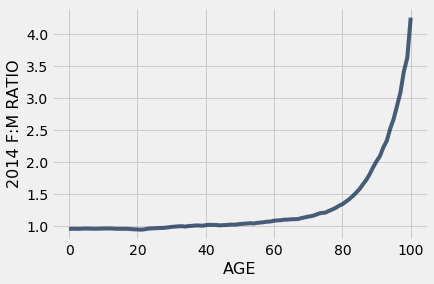

In [471]:
ratios.plot('AGE')
#the one inside plot ends up being the x axis

In [472]:
ratios

AGE,2014 F:M RATIO
0,0.955019
1,0.956884
2,0.956672
3,0.955058
4,0.959248
5,0.959998
6,0.959172
7,0.957445
8,0.957099
9,0.958511


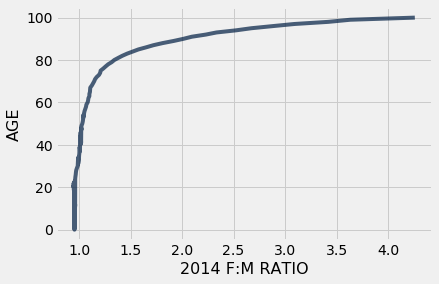

In [473]:
ratios.plot('2014 F:M RATIO')

In [475]:
data = "http://www.sharecsv.com/dl/f225dad4c697923ef36f4569c8eed1b7/links.csv"
#this link should download the file for you
movies = Table.read_table(data)
movies

movieId,imdbId,tmdbId
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862
6,113277,949
7,114319,11860
8,112302,45325
9,114576,9091
10,113189,710


In [487]:
movies = movies.relabeled('imdbId', 'id').relabeled('tmdbId',"x")

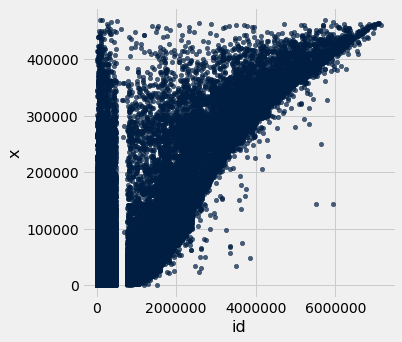

In [488]:
movies.scatter('id', 'x')